#### $\text{BioStat 558: Homework I}$
#### $\text{Madison Sanchez-Forman}$

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from IPython.display import display, Math, Latex
from tabulate import tabulate

sns.set_theme(font='Times New Roman')
np.random.seed(123456)

### $\text{Problem 2}$

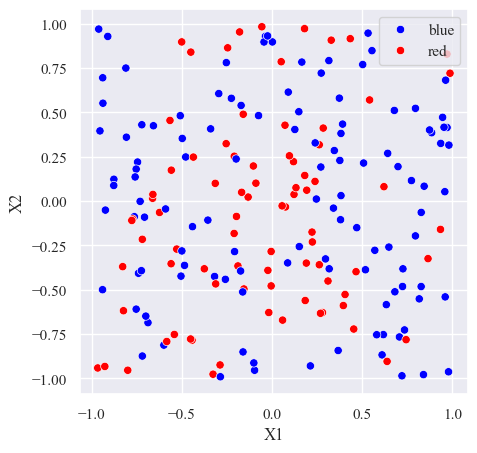

In [105]:
n = 200
tau = .4
x1 = np.random.uniform(-1, 1, n)
x2 = np.random.uniform(-1, 1, n)
Y_train = np.empty(n, dtype=object)

"""
2a: Generate 200 observations and plot data with tau = 0.4
"""
def generate_labels(Y, x1, x2, tau):
    """ Generate labels for data according to the assignment instructions """
    for i in range(n):
        if abs(x1[i]) < 0.2 and abs(x2[i]) < 0.2:
            Y[i] = 'red'
        else:
            Y[i] = 'red' if np.random.random() < tau else 'blue'
    return Y

def plot_data(x1, x2, Y_train):
    plt.figure(figsize=(5,5))
    ax = sns.scatterplot(x=x1, 
                        y=x2, 
                        hue=Y_train, 
                        legend=True, 
                        palette=['blue', 'red'])
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    
Y_train = generate_labels(Y_train, x1, x2, tau)
plot_data(x1, x2, Y_train);

In [106]:
def bayes_classifier(x1, x2):
    """ 
    if the first condition is not met, points are red w p = 0.4 and blue w p = 0.6, 
    blue probability will alwasy be higher 
    """
    if abs(x1) < 0.2 and abs(x2) < 0.2:
        return 'red'
    else:
        return 'blue'

#### $\text{2b: Mathematical Expression for Bayes Classifier}$
$\text{When } |X_1| < 0.2 \text{ and } |X_2| < 0.2\text{:}$

$\text{      }P(Y=\text{red}\mid X_1,X_2) = 1$,
$\text{      }P(Y=\text{blue}\mid X_1,X_2) = 0$

$\text{Otherwise:}$

$\text{      }P(Y=\text{red}|X_1, X_2) = 0$
$\text{      }P(Y=\text{blue}|X_1, X_2) = 1$, 


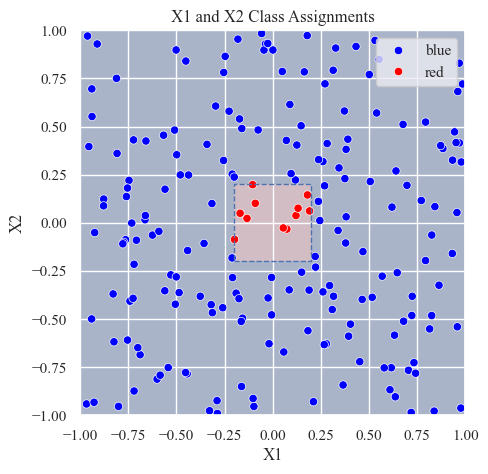

In [107]:

"""
2c: On plot from a, color or shade each possible value on the predictor 
for U arising from the Bayes classifier for that X1, X2 pair
"""
def plot_classifier_regions(x1, 
                            x2, 
                            classifier_func, 
                            title='X1 and X2 Class Assignments'):
                            
    Y_hat = np.array([classifier_func(x1[i], x2[i]) for i in range(len(x1))])
    resolution = 100
    x1_grid = np.linspace(-1, 1, resolution)
    x2_grid = np.linspace(-1, 1, resolution)
    X1_axis, X2_axis = np.meshgrid(x1_grid, x2_grid)
    # all points on the meshgrid
    all_points = np.array([[classifier_func(X1_axis[i, j], X2_axis[i, j]) 
                    for j in range(resolution)] for i in range(resolution)])
                        # map the red region
    red_region = np.zeros((resolution, resolution))
    red_region[all_points == 'red'] = 1

    # map the blue region
    blue_region = np.zeros((resolution, resolution))
    blue_region[all_points == 'blue'] = 1

    # plot the regions
    plt.figure(figsize=(5,5))
    ax = sns.scatterplot(x=x1, 
                        y=x2, 
                        hue=Y_hat, 
                        palette=['blue', 'red'], 
                        legend=True)

    ax.imshow(red_region, extent=[-1, 1, -1, 1], origin='lower', alpha=0.3, cmap='Reds')
    ax.imshow(blue_region, extent=[-1, 1, -1, 1], origin='lower', alpha=0.3, cmap='Blues')

    # plot the decision boundary
    ax.plot([-0.2, 0.2, 0.2, -0.2, -0.2], 
            [-0.2, -0.2, 0.2, 0.2, -0.2], 
            '--', 
            linewidth=1)

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title(title)
    return ax
plot_classifier_regions(x1, x2, bayes_classifier);

##### $\text{2d: Expression for the classification error } \forall(X_1, X_2)$

$\text{When } |X_1| < 0.2 \text{ and } |X_2| < 0.2\text{:}$

$\text{      }P(Y=\text{red}\mid X_1,X_2) = 1$,
$\text{      }P(Y=\text{blue}\mid X_1,X_2) = 0$

$\text{      }\max(1, 0) = 1$

$\text{Otherwise:}$

$\text{      }P(Y=\text{red}|X_1, X_2) = 0.4$,
$\text{      }P(Y=\text{blue}|X_1, X_2) = 0.6$

$\text{      }\max(0.4, 0.6) = 0.6$

##### $\text{2e: }\text{Bayes Error } := 1 - E[\max_{j} P(Y=j | X)]$

$\text{      Since we have } X_1,X_2 \sim \text{Unif}[-1,1]\text{, all points in this square have equal probability density.}$

$\text{      The probability of a point falling within a region is proportional to the area of the region.}$

$\therefore \text{      }X_1 \in [-1,1] \text{ and } X_2 \in [-1,1]$

$\text{            Total Area } = 2 * 2 = 4$

$\text{            }P(\text{inner}) = \text{area inner/total area} = (0.4 * 0.4)/4 = 0.04$

$\text{            }P(\text{outer}) = 1 - P(\text{inner}) = 0.96$

$\therefore \text{      }1-E[\max_{j}P(Y=j|X)]=$

$\text{            }1-(P(\text{inner})*1+P(\text{outer})*0.6) = $

$\text{            }1-(0.04 * 1 + 0.96 * 0.6) = 1 - 0.616 = 0.384$

$\text{            or } 38.4\%$

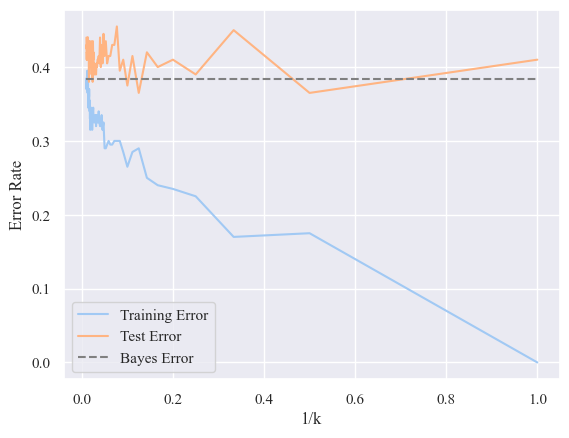

In [108]:
"""
2f: KNN
"""
def plot_knn_errors(x1, x2, Y_train, n, tau, bayes_error):
    """
    Plots training and test errors for KNN classifier with varying k values
    
    Parameters:
    x1, x2: Training data coordinates
    Y_train: Training labels
    n: Number of samples
    tau: Threshold parameter
    bayes_error: Pre-calculated Bayes error rate
    """
    X_train = np.column_stack((x1, x2))
    x1_test = np.random.uniform(-1, 1, n)
    x2_test = np.random.uniform(-1, 1, n)

    X_test = np.column_stack((x1_test, x2_test))
    Y_test = np.empty(n, dtype=object)
    generate_labels(Y_test, x1_test, x2_test, tau)

    k_values = range(1, n//2)
    train_error = []
    test_error = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(np.column_stack((x1, x2)), Y_train)
        
        train_pred = knn.predict(X_train)
        train_error.append(np.mean(train_pred != Y_train))

        test_pred = knn.predict(X_test)
        test_error.append(np.mean(test_pred != Y_test))

    # Plotting
    inv_k = [1/k for k in k_values]
    sns.set_palette('pastel')
    ax = sns.lineplot(x=inv_k, y=train_error, label='Training Error')
    ax = sns.lineplot(x=inv_k, y=test_error, label='Test Error')
    ax = sns.lineplot(x=inv_k, y=bayes_error, label='Bayes Error', linestyle='--', color='gray')
    ax.set_xlabel('1/k')
    ax.set_ylabel('Error Rate')
    return ax

plot_knn_errors(x1, x2, Y_train, n, tau, .384);

&emsp;
$\text{Here, the x axis represents the flexibility of the model. When K is small (high 1/k),}$
$\text{the modle is overly flexible and overfits to the training data. In contrast, when K is large (low 1/k),}$
$\text{variance is low while bias is high, making the model inflexible and underfitting the training data. }$
$\text{The ideal K lies where the test error intersects with and therefore best estimates the Baye's Error}$
$\text{around 0.2 or k=20.}$

#### $\text{2g: Repeat a-f with }\tau = 0.1\text{, how do results change?}$

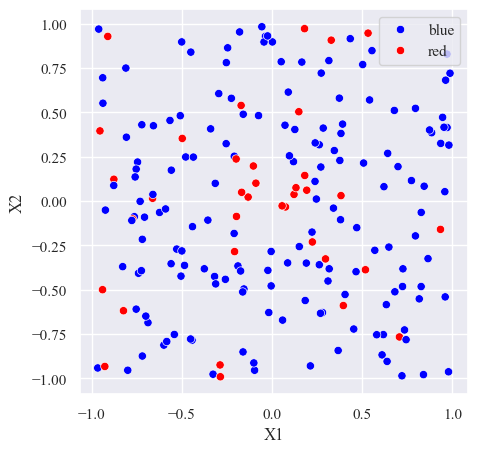

In [109]:
tau = .1
# a) Scatterplot of true class labels
generate_labels(Y_train, x1, x2, tau)
plot_data(x1, x2, Y_train);

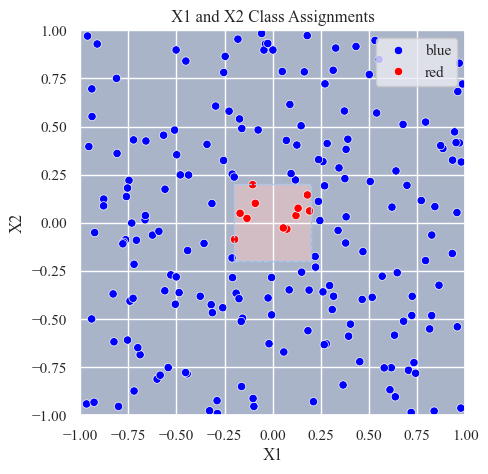

In [110]:
# b) Bayes classifier again
plot_classifier_regions(x1, x2, bayes_classifier);

##### $\text{2d: Expression for the classification error } \forall(X_1, X_2)$

$\text{When } |X_1| < 0.2 \text{ and } |X_2| < 0.2\text{:}$

$\text{      }P(Y=\text{red}\mid X_1,X_2) = 1$
$\text{      }P(Y=\text{blue}\mid X_1,X_2) = 0$

$\text{      }\max(1, 0) = 1$

$\text{Otherwise:}$

$\text{      }P(Y=\text{red}|X_1, X_2) = 0.1$
$\text{      }P(Y=\text{blue}|X_1, X_2) = 0.9$

$\text{      }\max(0.1, 0.9) = 0.9$

##### $\text{2e: Bayes Error}$

$\text{      }X_1 \in [-1,1] \text{ and } X_2 \in [-1,1]$

$\text{      Total Area } = 2 * 2 = 4$

$\text{      }P(\text{inner}) = \text{area inner/total area} = (0.4 * 0.4)/4 = 0.04$

$\text{      }P(\text{outer}) = 1 - P(\text{inner}) = 0.96$

$\text{      }1-(P(\text{inner})*1+P(\text{outer})*0.9)=$

$\text{      }1-(0.04 * 1 + 0.96 * 0.9) = 0.096$

$\text{      or } 9.6\%$

$\text{When } \tau \text{ decreases, the Bayes error decreases significantly. This is because the reduction in } \tau \text{ reduced}$

$\text{the randomness in our data. In the generate labels function, we are assigning labels blue with significantly more}$

$\text{probability in the case where we are in the outer region. Therefore, the Bayes error fits the data much better,}$

$\text{as the majority of the points in the outer region will be blue, and the inner region will be completely red. The probability}$

$\text{of the labels and the logic of the classifier align much more closely.}$

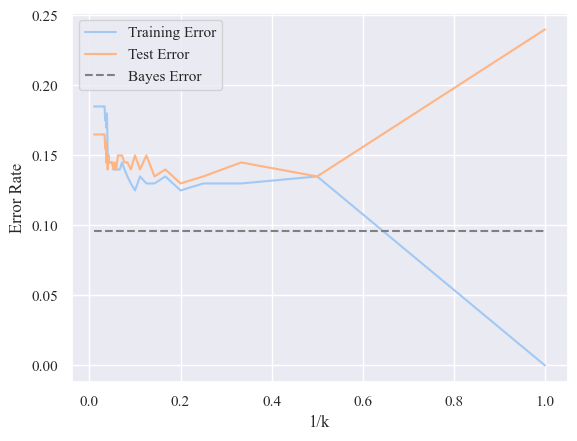

In [111]:
Y_train = np.empty(n, dtype=object)
generate_labels(Y_train, x1, x2, tau)
plot_knn_errors(x1, x2, Y_train, n, .1, .096);

&emsp;$\text{When } \tau \text{ decreases, the dataset becomes more seperatable.}$
$\text{Therefore, the KNN classifier is able to classify the data much more accurately.}$
$\text{The training error and test error decrease as the model becomes more flexible. However, the test error is still higher than the Bayes error,}$
$\text{indicating that the model is still overfitting the data with small k and underfitting with large k.}$
$\text{Since tau is much smaller there is much less noise,}$
$\text{so there is no K that will perfectly approximate the Baye's Boundary.}$


### $\text{Problem 4}$
$f_1(X) := 1+X \text{ and } f_2(X) := 1+X+X^2+X^3$

#### $\text{4a: Irreducible Error} = \text{Var}(\epsilon)$
#### $\text{4b: Var}(f_1(X)) = \text{Var}(f_2 (X)) = 1$

$\text{Since we know that }\epsilon\sim N(0,1) \text{ and epsilon is dependent on the noise of the data, not the function.}$
$\text{Therefore, both functions have an irreducible error of 1}$

In [112]:
def f(X, k):
    """ returns the associated function for the given k """
    if k == 1:
        return 1+X
    elif k == 2:
        return 1+X+X**2+X**3

def function_str(k):
    """ returns the function as a latex string for printing beauty """
    str = f'f_{k}(X) = 1 + X' if k == 1 else f'f_{k}(X) = 1 + X + X² + X³'
    as_rstring = r"$" + str + "$"
    return as_rstring

def simulation(n_test=10000, n_train_sets=1000, n_train=5000):
    degrees = [0, 1, 2, 3] # constant, linear, squared, cubic
    results = {}
    EPEs = {}
    X_test = np.random.normal(0, 1, n_test) # test data
    irreducible_error = 1

    for k in [1, 2]:
        f_true = f(X_test, k)
        results[k] = {}
        for deg_idx, deg in enumerate(degrees):
            predictions = np.zeros((n_train_sets, n_test))
            for i in range(n_train_sets):
                epsilon = np.random.normal(0, 1, n_train) # noise

                X_train = np.random.normal(0, 1, n_train)
                Y_train = f(X_train, k) + epsilon

                if deg == 0:
                    # constant model is like predicting the mean of the training data
                    predictions[i] = np.mean(Y_train) * np.ones(n_test)
                else:
                    # fit the model
                    model = make_pipeline(
                        PolynomialFeatures(degree=deg),  
                        LinearRegression(fit_intercept=False) # false because polynomial features includes an intercept
                        )
                    model.fit(X_train.reshape(-1, 1), Y_train)
                    predictions[i] = model.predict(X_test.reshape(-1, 1))
                    
            # Calculate components of MSE
            mean_pred = np.mean(predictions, axis=0)
            bias = (mean_pred - f_true) ** 2
            variance = np.var(predictions, axis=0)
            epe = bias + variance + irreducible_error

            results[k][deg]={
                'squared_bias': bias,
                'variance': variance,
                'EPE': epe,
                'names': degrees[deg_idx]}
            # summary data for table later
            if 'summary_data' not in results[k]:
                results[k]['summary_data'] = []
            results[k]['summary_data'].append([degrees[deg_idx], 
                                            np.mean(bias),
                                            np.mean(variance), 
                                            np.mean(epe)])
    return results, X_test

def tabulate_results(results):
    for k in [1, 2]:
        r_string = function_str(k)
        headers = ['Degree', 'Bias²', 'Variance', 'Expected Prediction Error']
        table_data = results[k]['summary_data']
        display(Math(r_string))
        print(tabulate(table_data, headers=headers, tablefmt='fancy_grid', floatfmt=".10f", colalign=('center', 'center', 'center', 'center')))

def plot_results(f_k_results, X_test, k, show_extra=True):
    names = ['Degree 0', 'Degree 1', 'Degree 2', 'Degree 3']
    degrees = [0, 1, 2, 3]
    fig, axes = plt.subplots(1, 4, figsize=(15, 4))
    xaxis_latex_label = r"$x_0$"

    for deg_idx, deg in enumerate(degrees):
        ax = axes[deg_idx]
        plot_data = []
        idx = np.argsort(X_test)
        x_sorted = X_test[idx]
        epe_vals = f_k_results[deg]['EPE'][idx]
        bias_vals = f_k_results[deg]['squared_bias'][idx]
        var_vals = f_k_results[deg]['variance'][idx]

        for x, epe, bias, var in zip(x_sorted, epe_vals, bias_vals, var_vals):
            plot_data.append({
                'x': x,
                'EPE': epe,
                'Bias': bias,
                'Variance': var,
                'Model': names[deg_idx]
            })
        df = pd.DataFrame(plot_data)
        r_string = function_str(k)
        fig.suptitle(r_string)
        sns.lineplot(data=df, x='x', y='EPE', ax=ax, label='EPE', legend=False) 
        if show_extra:
            sns.lineplot(data=df, x='x', y='Bias', ax=ax, label='Bias', legend=False)
            sns.lineplot(data=df, x='x', y='Variance', ax=ax, label='Variance', legend=False)
            ax.set_yscale('log')  # set y-axis to log scale so we can see larger and smaller values
        ax.set_title(names[deg_idx])
        ax.set_xlabel(xaxis_latex_label)

        if deg_idx == 0:
            if show_extra:
                ax.set_ylabel('Log Scale')
            else:
                ax.set_ylabel('EPE')
            ax.legend(loc='upper left')
        else:
            ax.set_ylabel('')
            
results, X_test = simulation();
tabulate_results(results)

<IPython.core.display.Math object>

╒══════════╤══════════════╤══════════════╤═════════════════════════════╕
│  Degree  │    Bias²     │   Variance   │  Expected Prediction Error  │
╞══════════╪══════════════╪══════════════╪═════════════════════════════╡
│    0     │ 1.0002992747 │ 0.0003853432 │        2.0006846179         │
├──────────┼──────────────┼──────────────┼─────────────────────────────┤
│    1     │ 0.0000002292 │ 0.0003895239 │        1.0003897531         │
├──────────┼──────────────┼──────────────┼─────────────────────────────┤
│    2     │ 0.0000010193 │ 0.0006239885 │        1.0006250079         │
├──────────┼──────────────┼──────────────┼─────────────────────────────┤
│    3     │ 0.0000007914 │ 0.0007654738 │        1.0007662652         │
╘══════════╧══════════════╧══════════════╧═════════════════════════════╛


<IPython.core.display.Math object>

╒══════════╤═══════════════╤══════════════╤═════════════════════════════╕
│  Degree  │     Bias²     │   Variance   │  Expected Prediction Error  │
╞══════════╪═══════════════╪══════════════╪═════════════════════════════╡
│    0     │ 23.1245996467 │ 0.0048305481 │        24.1294301948        │
├──────────┼───────────────┼──────────────┼─────────────────────────────┤
│    1     │ 7.4657094511  │ 0.0124627779 │        8.4781722290         │
├──────────┼───────────────┼──────────────┼─────────────────────────────┤
│    2     │ 5.4774432346  │ 0.0466832649 │        6.5241264995         │
├──────────┼───────────────┼──────────────┼─────────────────────────────┤
│    3     │ 0.0000005607  │ 0.0007728481 │        1.0007734088         │
╘══════════╧═══════════════╧══════════════╧═════════════════════════════╛



&emsp;$\text{Overall, we see that the functions are best estimated by models of the same degree. Fitting a model with a degree}$
$\text{lower than that of the goal function shows signfigant bias for both functions. More specificially, when trying to}$
$\text{estimate } f_1\text{, the intercept only model has much higher bias than all of the other models. This high bias shows}$
$\text{up in the respective EPE. While when it is estimated with an intercept and one feature, we see the lowest EPE of all}$
$\text{three of the variations that is almost 1 (which is our estimate of } \epsilon \text{). Also of note that at degree 1, the}$
$\text{variance of the model increases slightly as bias drops off.}$


&emsp;$\text{However, when we attempt to predict } f_1 \text{ with functions of higher degrees (2-3) we see that the added}$
$\text{complexity of the function increases the variance without signfigantly decreasing bias. This in turn adds to the EPE.}$


&emsp;$\text{Similarly for } f_2\text{, we see bias decrease from degree 0-2, and reach a happy balance with variance at degree 3.}$
$\text{We can again confirm this by seeing that the EPE for degree 3 of } f_2 \text{ is nearly just irreducible error.}$

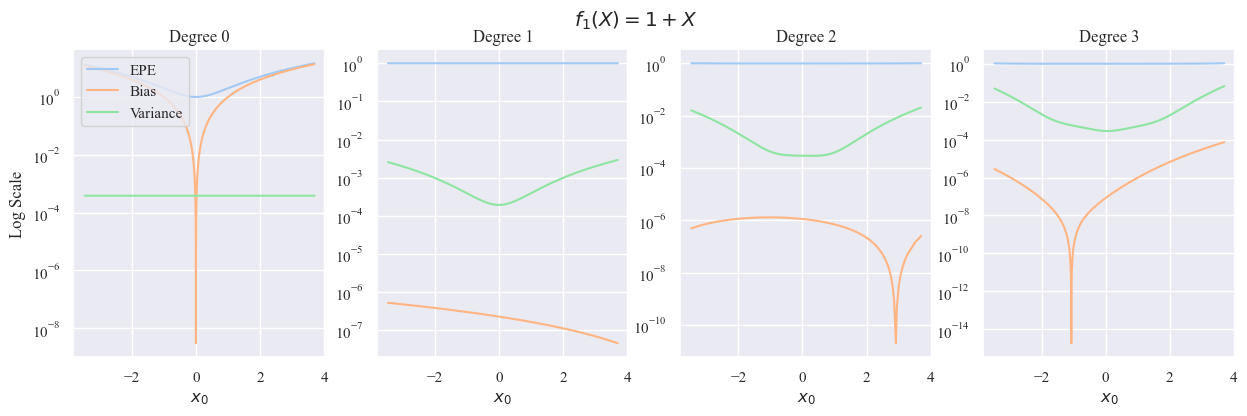

In [113]:
f1_results = results[1]
f2_results = results[2]
plot_results(f1_results, X_test, 1)

&emsp;$\text{I converted the y axis to log scale in order to look at EPE, bias, and variance. A plot/comments on just EPE is at the end.}$ 

$\text{For }f_1\text{ we can see visually here that we get the best bias-variance balance at degree 1. At degree 0, we can see severe}$
$\text{underfitting. Bias is extremely high everywhere except near the mean of x₀'s, likely because at degree 0 we are basically}$
$\text{predicting the mean of the } x_0\text{'s. Therefore, it only happens to align with } f_1\text{ around 0 since } x_0\text{ comes from a standard normal}$
$\text{distribution. Since bias is extremely high, we expectedly see almost no variance and EPE dominated by the high bias. In}$
$\text{contrast, degree 1 is clearly our best balance with a significantly lower bias (}10^{-6} \text{ rather than } 10^1\text{) and higher}$
$\text{variance. We also see that bias is no longer dominating EPE. We see overfitting in the higher degrees as bias picks back up.}$

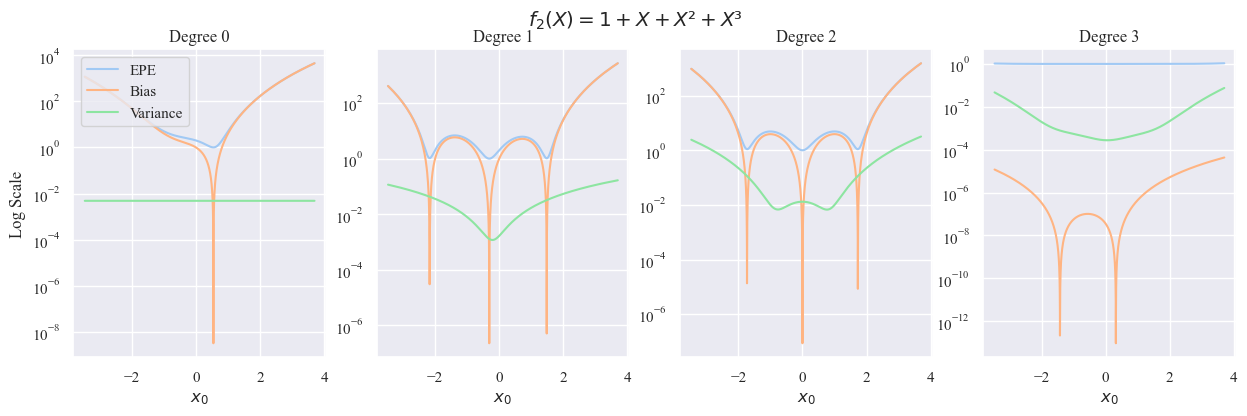

In [114]:
plot_results(f2_results, X_test, 2)

&emsp;$\text{For } f_2\text{ we see the same pattern of underfitting in degrees too simple for the cubic function.}$
$\text{Degree 3 is our best estimation, again with the lowest bias of the three balanced out by an acceptable}$
$\text{variance and EPE close to irreducible error.}$

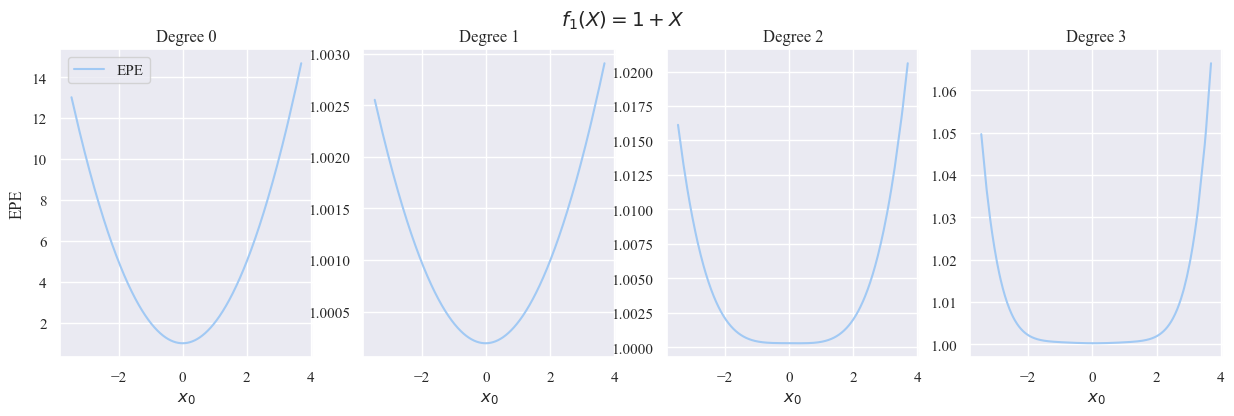

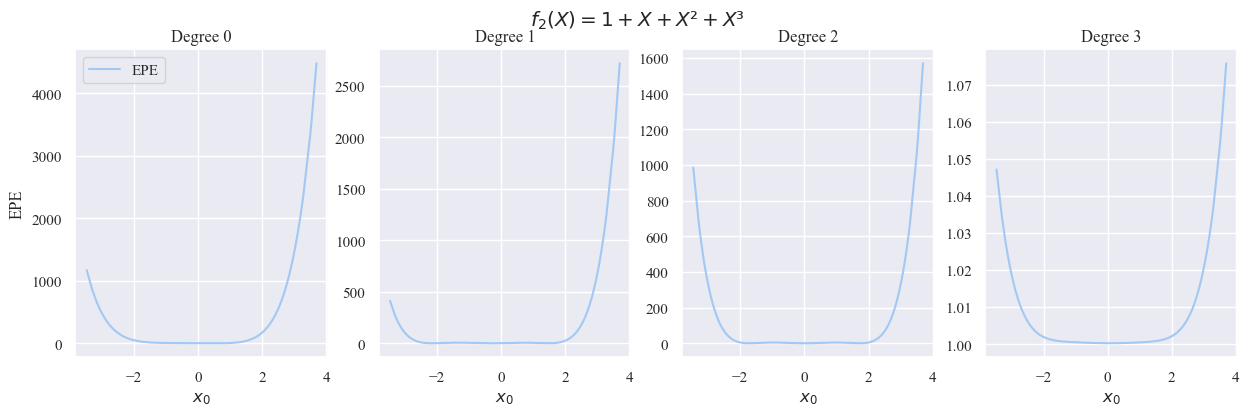

In [115]:
plot_results(f1_results, X_test, 1, show_extra=False)
plot_results(f2_results, X_test, 2, show_extra=False)

&emsp;$\text{When looking just at EPE, we can see the y axis scale change significantly across the different degrees.}$
$\text{For both models, we know we are at the best balance of bias and variance when the range of EPE is as similar }$
$\text{to irreducible error as possible i.e. degree 1 for f1 and degree 3 for f2.}$